# Multilayer Perceptrons for Multiclass Land Classification (Exercise)

## The Data

For this exercise we are going to use the Pavia University Hyperspectral Image for multiclass classification purposes. The Pavia University HSI was acquired by the ROSIS sensor during a flight campaign over Pavia, northern Italy. The HSI data is publicly available on [Group De Inteligencia Computacional (GIC)](http://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes).

**Information**

These are two scenes acquired by the ROSIS sensor during a flight campaign over Pavia, nothern Italy. The number of spectral bands is 102 for Pavia Centre and 103 for Pavia University. Pavia Centre is a 1096*1096 pixels image, and Pavia University is 610*610 pixels, but some of the samples in both images contain no information and have to be discarded before the analysis. The geometric resolution is 1.3 meters. Both image groundtruths differenciate 9 classes each. It can be seen the discarded samples in the figures as abroad black strips.

**Groundtruth classes for the Pavia University scene and their respective samples number:**

*#* | Class | Samples
:----- | :----: | -----:
1 |Asphalt	            |6631
2 |Meadows	            |18649
3 |Gravel	            |2099
4 |Trees	            |3064
5 |Painted metal sheets |1345
6 |Bare Soil	        |5029
7 |Bitumen	            |1330
8 |Self-Blocking Bricks |3682
9 |Shadows	            |947

## Table of Contents
- ### [Python libraries](#libraries)
- ### [Data Exploration and Feature Engineering](#exploration)
    - #### [Read the data](#read)
    - #### [Class balance](#balance)
- ### [Label and One-Hot encoding](#one-hot)
    - #### [Create the `X` and `y` variables](#variables)
    - #### [Encode target labels](#encoders)
- ### [Split the Data](#split)
- ### [Normalize the Data](#normalize)
- ### [Create the Model](#model)
- ### [Train the Model](#training)
- ### [Evaluate the Model](#evaluation)
- ### [Predictions](#predictions)

<a id='libraries'></a>
## Python libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
import matplotlib.pyplot as plt

<a id='exploration'></a>
## Data Exploration and Feature Engineering

<a id='read'></a>
### Read the data
The Pavia university HSI has 103 spectral bands and It contains 610 * 340 pixels. 

In [2]:
data = loadmat('../../Data/PaviaU.mat')['paviaU']

gt = loadmat('../../Data/PaviaU_gt.mat')['paviaU_gt']

df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1], -1))
                  
df.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]

df['class'] = gt.ravel()  
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band95,band96,band97,band98,band99,band100,band101,band102,band103,class
0,647,499,464,371,291,319,365,322,296,305,...,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,...,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,...,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,...,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,...,2392,2344,2289,2328,2415,2424,2386,2431,2456,0


Spectral samples of the image contain no information which is defined as Zero (0) and they have to be discarded before the analysis.

In [3]:
df = df[df['class']!=0]

**Spectral Bands**

Let’s see a few spectral bands of the Pavia University HSI, the below code randomly plots 10 out of 103 spectral bands of the data.

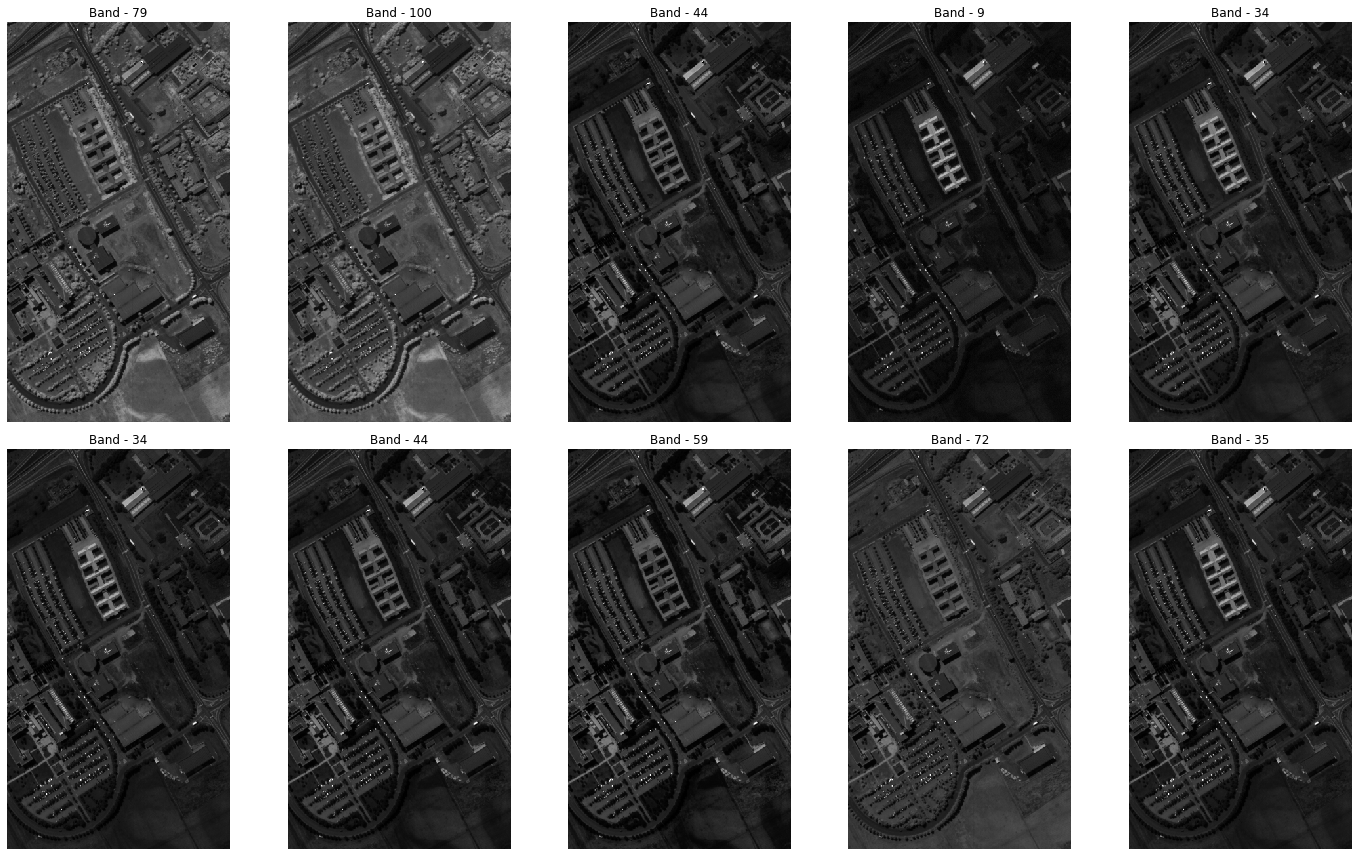

In [4]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
    for j in range(5):
        c = np.random.randint(103)
        ax[i][j].imshow(data[:, :, c], cmap='gray')
        ax[i][j].axis('off')
        ax[i][j].title.set_text(f"Band - {c}")
        c+=1

plt.tight_layout()

plt.show()

**Groundtruth**

Let’s see the ground truth of the Pavia university HSI, the black color represents the pixels with no information which will need to be discarded.

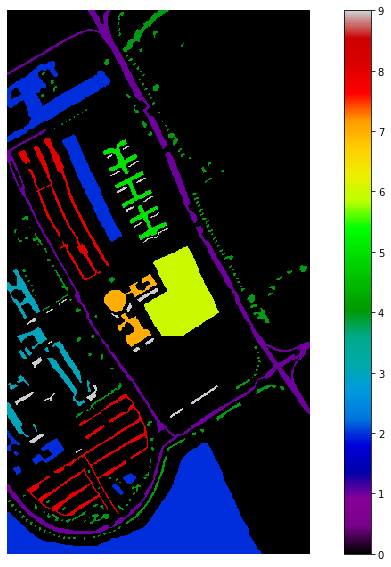

In [5]:
fig = plt.figure(figsize=(12, 10))
plt.imshow(gt, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()

<a id='balance'></a>
### Class balance
**TASK: Check if the classes are balanced. Create a countplot as shown below.**

In [ ]:
# CODE HERE

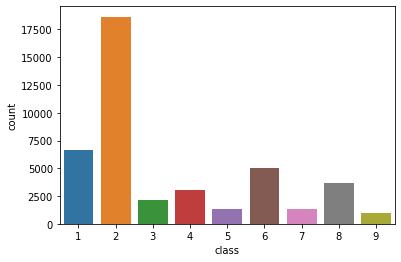

<a id='one-hot'></a>
## One-Hot encoding
For multiclass classification we have to represent categorical data in the form of binary vectors.

<a id='variables'></a>
### Create the `X` and `y` variables
**TASK: Create the `X` and `y` variables by taking the `.values` of the numerical features and classes, respectively. Take as classes the `class` column.**

In [ ]:
# CODE HERE

**TASK: Display the shapes of the `X` and `y` variables and the first 5 labels.**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

(42776, 103)

(42776,)

<a id='encoders'></a>
### Encode target labels
#### One-Hot Encoder

**TASK: Use a `OneHotEncoder` to encode the new categorical features of `y` as a one-hot numeric array. Display the shape of the new `y` variable and the first 5 values.**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

(42776, 9)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.]])

<a id='split'></a>
## Split the Data
**TASK: Import [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) form `sklearn`.**

In [ ]:
# CODE HERE

**TASK: Perform a train/test split with `test_size=0.25` and a `random_state=42`. Display the shapes of the `X_train` and `y_train` variables.**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

(32082, 103)

(32082, 9)

<a id='normalize'></a>
## Normalize the Data
**TASK: Import [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) form `sklearn`.**

In [ ]:
# CODE HERE

**TASK: Use a `MinMaxScaler` to normalize the `X_train` and `X_test` values.**

In [ ]:
# CODE HERE

<a id='model'></a>
## Create the Model

**TASK: Import [`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) model and [`Input`](https://keras.io/api/layers/core_layers/input/), [`Dense`](https://keras.io/api/layers/core_layers/dense/), and [`Dropout`](https://keras.io/api/layers/regularization_layers/dropout/) layer form `tensorflow.keras`.**

In [ ]:
# CODE HERE

**TASK: Build a sequential model with this structure:**
- `Input` layer
- 4 `Dense` layers with 128 neurons each
- 1 `Dropout` layers with rate = 0.2.
- 4 `Dense` layers with 64 neurons each
- 1 `Dropout` layers with rate = 0.2.
- 4 `Dense` layers with 32 neurons each
- 1 `Dense` layers with `nClasses` neurons

**As we are dealing with a multiclass classification task use the [`softmax`](https://en.wikipedia.org/wiki/Softmax_function) activation function in the output layer and the `categorical_crossentropy` loss. Add also the `accuracy` as an [additional metric](https://keras.io/api/metrics/).**

In [ ]:
# CODE HERE

<a id='training'></a>
## Train the Model

**TASK: Train the model for 100 epochs. Don't forget to include the validation data.**

In [ ]:
# CODE HERE

#### Check if the model overfits:

**TASK: Plot the training and validation loss.**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

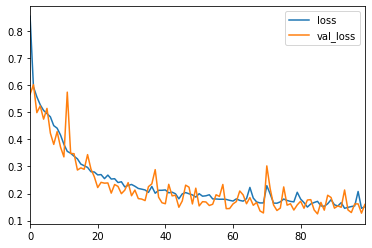

**TASK: Plot the training and validation accuracy.**

In [ ]:
# CODE HERE

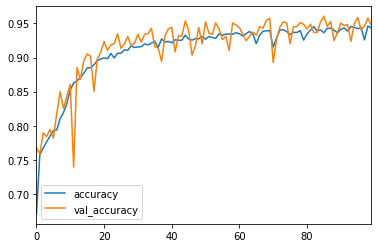

<a id='evaluation'></a>
## Evaluate the Model
Check common classification metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

**TASK: Import [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) form `sklearn`.**

In [ ]:
# CODE HERE

**TASK: Create predictions of the `X_test` dataset and display the output shape**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

(10694,)

**TASK: Encode predictions as a one-hot numeric array and display the shape**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

(10694, 9)

**TASK: Print the `classification_report`**

In [ ]:
# CODE HERE

                         precision    recall  f1-score   support

             1. Asphalt       0.97      0.95      0.96      1650
             2. Meadows       0.98      0.96      0.97      4678
              3. Gravel       0.95      0.73      0.82       542
               4. Trees       0.97      0.97      0.97       749
5. Painted metal sheets       1.00      1.00      1.00       344
           6. Bare Soil       0.87      0.96      0.91      1269
             7. Bitumen       0.95      0.91      0.93       329
8. Self-Blocking Bricks       0.82      0.96      0.88       927
             9. Shadows       1.00      1.00      1.00       206

              micro avg       0.95      0.95      0.95     10694
              macro avg       0.95      0.94      0.94     10694
           weighted avg       0.95      0.95      0.95     10694
            samples avg       0.95      0.95      0.95     10694



**TASK: Print the `confusion_matrix`**

In [ ]:
# CODE HERE

In [32]:
print(confusion_matrix(onehot_encoder.inverse_transform(y_test),predictions))

[[1564    1    8    0    0    5   15   57    0]
 [   0 4487    0   22    0  164    0    5    0]
 [  10    0  395    0    0    3    0  134    0]
 [   0   17    0  730    0    2    0    0    0]
 [   0    0    0    0  343    1    0    0    0]
 [   0   47    0    1    0 1219    0    2    0]
 [  26    0    0    0    0    0  301    2    0]
 [   7    5   14    0    0   10    0  891    0]
 [   0    0    0    0    0    0    0    0  206]]


<a id='predictions'></a>
## Predictions

**We will performe the prediction of the entire Pavia university HSI dataset. It contains 610 * 340 pixels**

**TASK: Flattened the input dataset and display the shape.**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

(207400, 103)

**TASK: Normalize the input dataset.**

In [ ]:
# CODE HERE

**TASK: Predict the corresponding classes with `model.predict_classes` and display the shape of the output dataset.**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

(207400,)

**TASK: Shift by 1 the values of each class.**

We have to shift by 1 all the class values to match with the `groundtruth` class values. 

In [ ]:
# CODE HERE

**TASK: Reshape the output dataset to match with the input image of 610 * 340 pixels. Display the new shape.**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

(610, 340)

**TASK: Set to zero pixels with no information.**

We set to zero the pixels where the spectral samples of the input image contain no information, i.e. where the groundtruth is equal 0

In [ ]:
# CODE HERE

**TASK: Visualize the classification map. Display both the `groundtruth` and the `prediction` side by side.**

In [ ]:
# CODE HERE

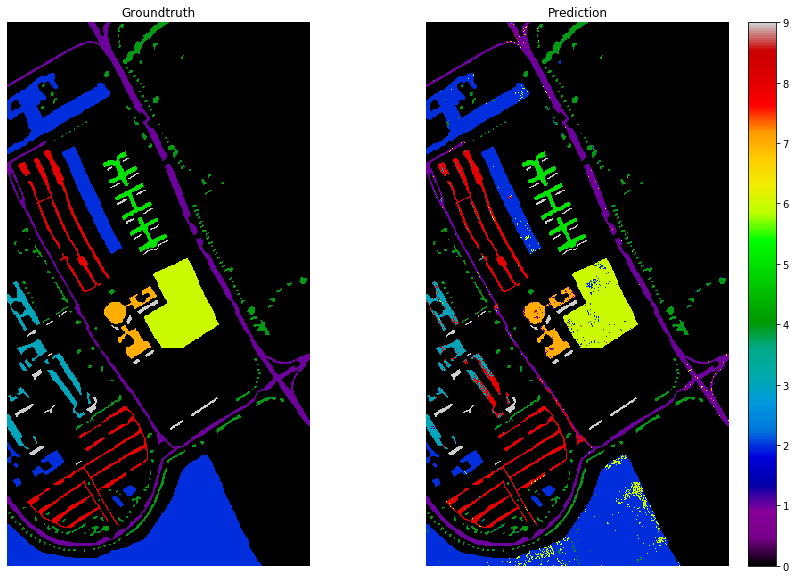